In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score 
import missingno as msno

In [43]:
data = pd.read_csv(("SBAnational.csv"), low_memory=True)

/tmp/ipykernel_12179/2587724649.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(("SBAnational.csv"), low_memory=True)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [45]:
missing_values = data.isna().sum()
missing_values



LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [46]:
doublons = data[data.duplicated()]
doublons



,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [47]:
description = data.describe()
description

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [48]:
colonnes = data.columns
colonnes

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Nettoyage colonnes $ et , 

In [49]:
ColonnesUSD = ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]
data[ColonnesUSD] = data[ColonnesUSD].replace(r'[\$,]', '', regex=True).astype(float)
data[ColonnesUSD].head()


,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [50]:
data.to_csv("datawithout$.csv", index=False)

In [51]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0


valeurs manquantes

In [63]:
manquants = data[data.isnull().any(axis=1)]
manquants

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite,activities
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45,Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72,Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62,Health care and social assistance
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,45,Retail trade
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,45,Retail trade
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0,33,Manufacturing
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,0,NaN


In [67]:
manquants = data.isnull().sum()
missing_percent = (manquants / len(data)) * 100
missing_table = pd.concat([manquants, missing_percent], axis=1)
print(missing_table)

                         0          1
LoanNr_ChkDgt            0   0.000000
Name                    14   0.001557
City                    30   0.003336
State                   14   0.001557
Zip                      0   0.000000
Bank                  1559   0.173383
BankState             1566   0.174162
NAICS                    0   0.000000
ApprovalDate             0   0.000000
ApprovalFY               0   0.000000
Term                     0   0.000000
NoEmp                    0   0.000000
NewExist               136   0.015125
CreateJob                0   0.000000
RetainedJob              0   0.000000
FranchiseCode            0   0.000000
UrbanRural               0   0.000000
RevLineCr             4528   0.503579
LowDoc                2582   0.287156
ChgOffDate          736465  81.905526
DisbursementDate      2368   0.263356
DisbursementGross        0   0.000000
BalanceGross             0   0.000000
MIS_Status            1997   0.222095
ChgOffPrinGr             0   0.000000
GrAppv      

extraction domaine d’activité

In [52]:
data["domaine d’activite"] = data["NAICS"].astype(str).str[:2]

In [53]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0


creation dictionnaire de categories d’activités

In [54]:
activitiestypes = {
    11: "Agriculture, forestry, fishing and hunting",
    21: "Mining, Quarrying, and oil and gas extraction",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale trade",
    44: "Retail trade",
    45: "Retail trade",
    48: "Transportation and warehousing",
    49: "Transportation and warehousing",
    51: "Information",
    52: "Finance and insurance",
    53: "Real estate and rental and leasing",
    54: "Professional, scientific, and technical services",
    61: "Educational services",
    62: "Health care and social assistance",
    71: "Arts, enternaiment, and recreation",
    72: "Accommodation and food services",
    81: "Other services (except public administration)",
    }

In [55]:
data["activities"] = data["domaine d’activite"].astype(int).map(activitiestypes)
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite,activities
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45,Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72,Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62,Health care and social assistance
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0,NaN


Diagramme de secteur d’activité

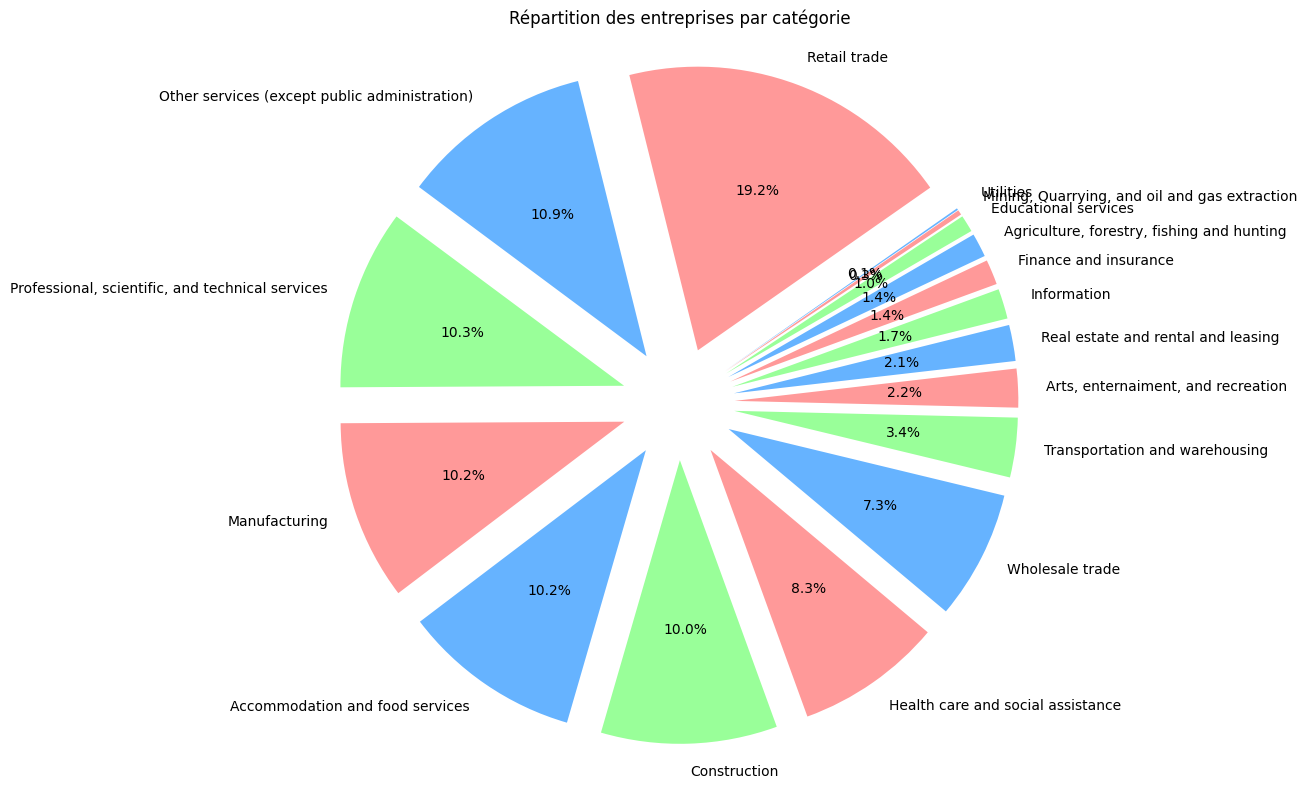

In [56]:
Categories = data["activities"].value_counts()

explode = [0.2] * len(Categories)

plt.figure(figsize=(12, 8))
plt.pie(Categories, labels=Categories.index, autopct='%1.1f%%', startangle=35, colors=['#ff9999','#66b3ff','#99ff99'], explode=explode)
plt.title('Répartition des entreprises par catégorie')
plt.axis('equal')  # Assurer que le diagramme en camembert est un cercle
plt.tight_layout()
plt.show()

Repartition par etats

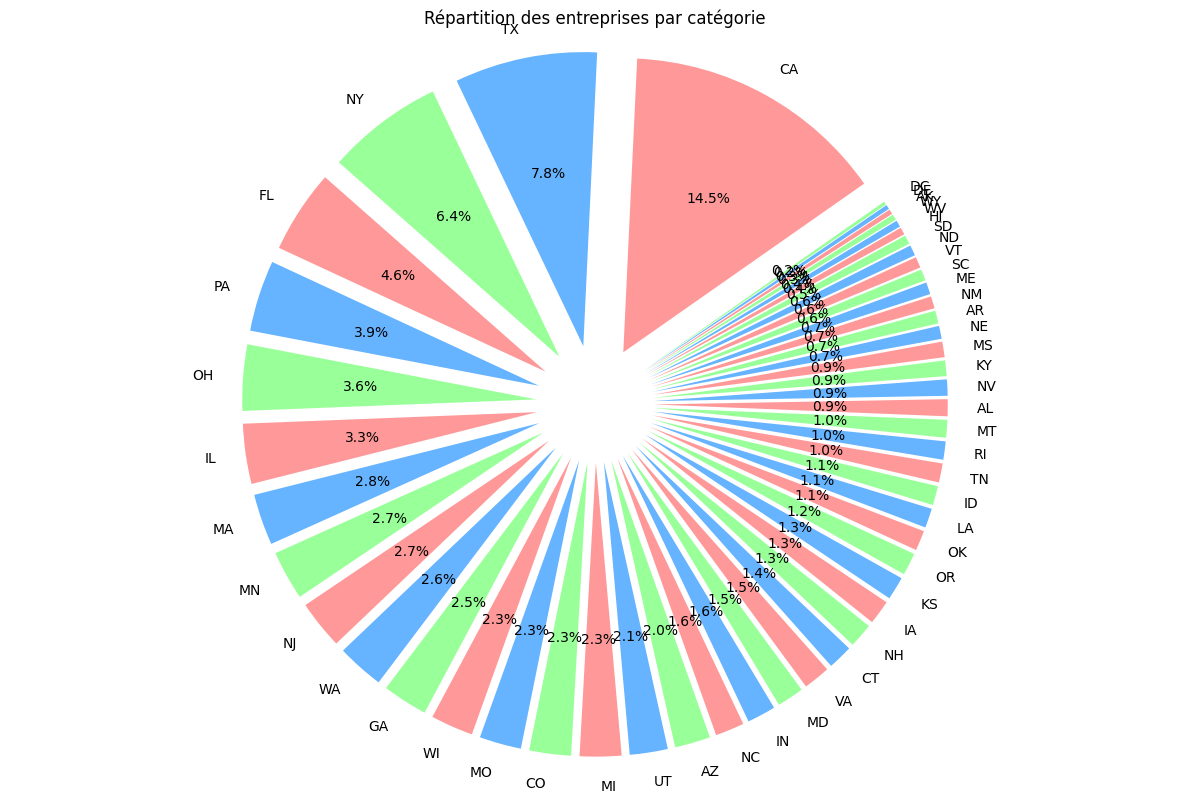

In [57]:
Etats = data["State"].value_counts()

explode = [0.2] * len(Etats)

plt.figure(figsize=(12, 8))
plt.pie(Etats, labels=Etats.index, autopct='%1.1f%%', startangle=35, colors=['#ff9999','#66b3ff','#99ff99'], explode=explode)
plt.title('Répartition des entreprises par catégorie')
plt.axis('equal') 
plt.tight_layout()
plt.show()


repartition par années d’accord de pret

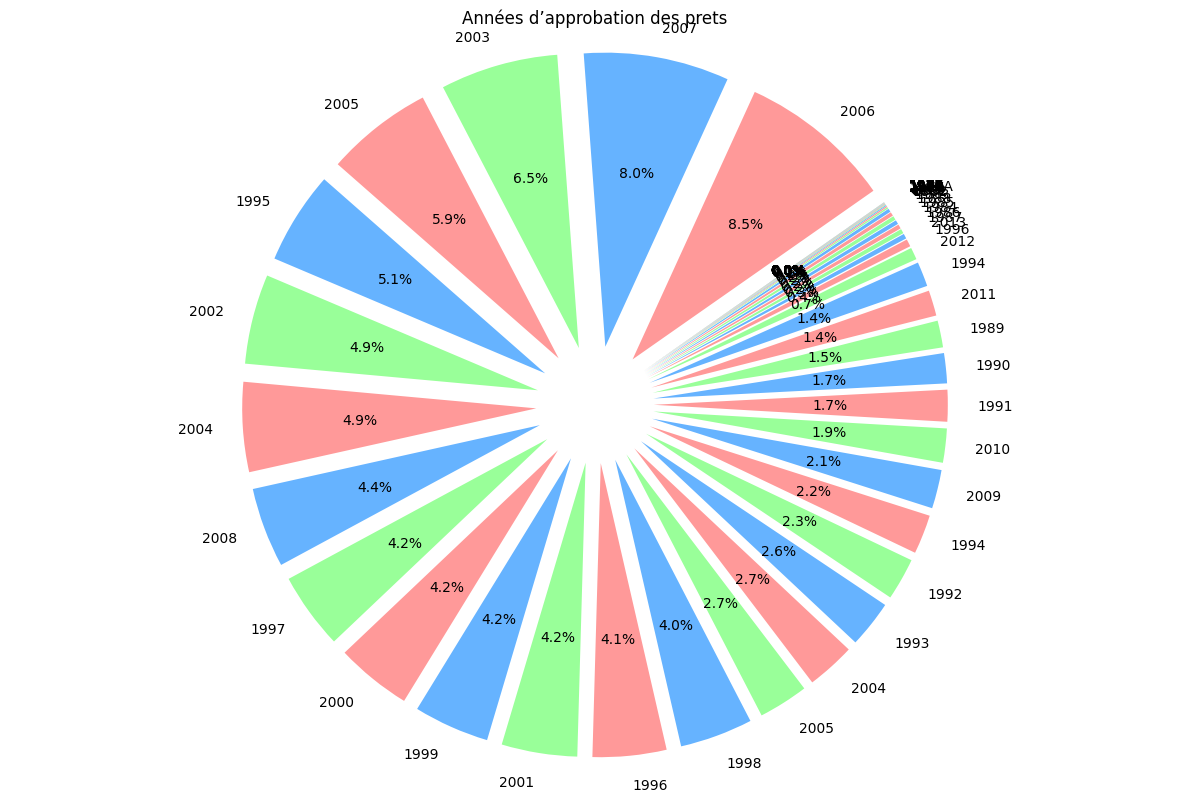

In [68]:
YearsApproval = data["ApprovalFY"].value_counts()

explode = [0.2] * len(YearsApproval)    

plt.figure(figsize=(12, 8))
plt.pie(YearsApproval, labels=YearsApproval.index, autopct='%1.1f%%', startangle=35, colors=['#ff9999','#66b3ff','#99ff99'], explode=explode)
plt.title('Années d’approbation des prets')
plt.axis('equal') 
plt.tight_layout()
plt.show()


analyse pas missingno

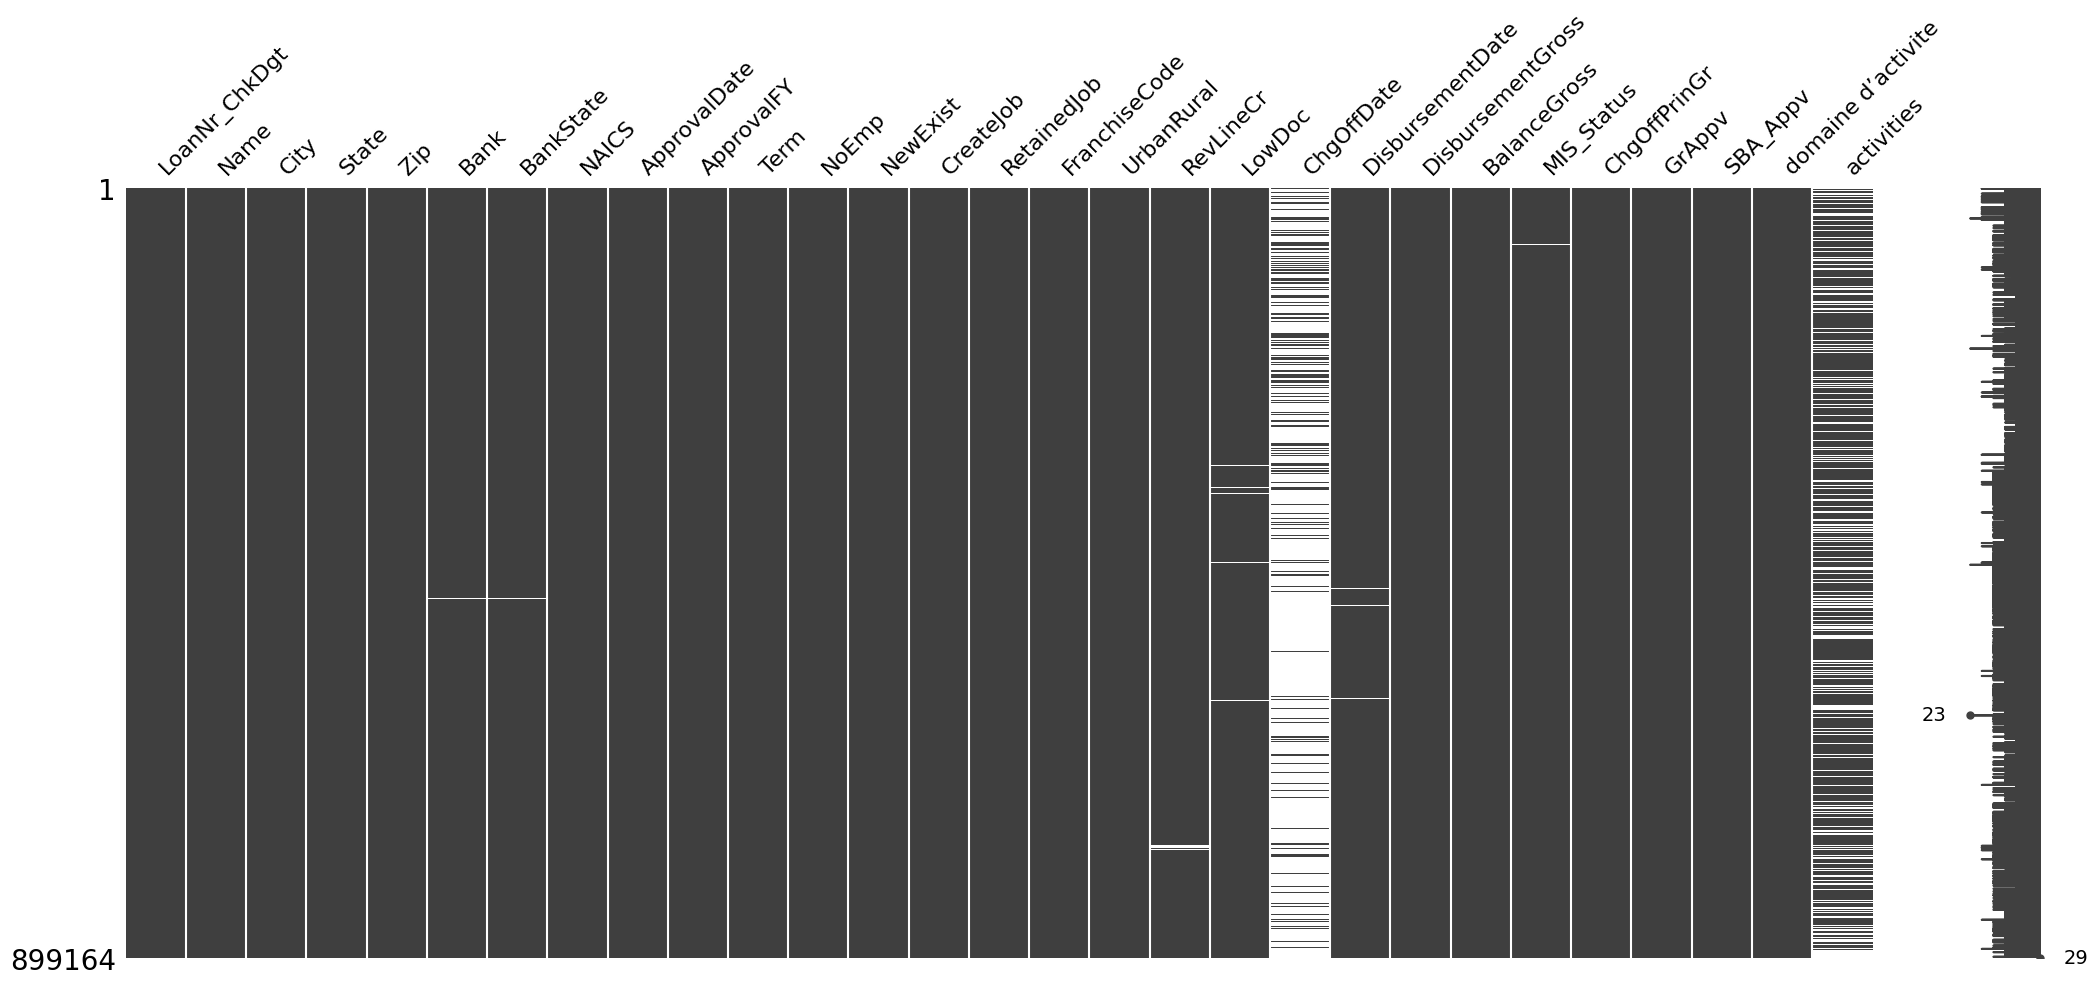

In [60]:
msno.matrix(data)
plt.show()

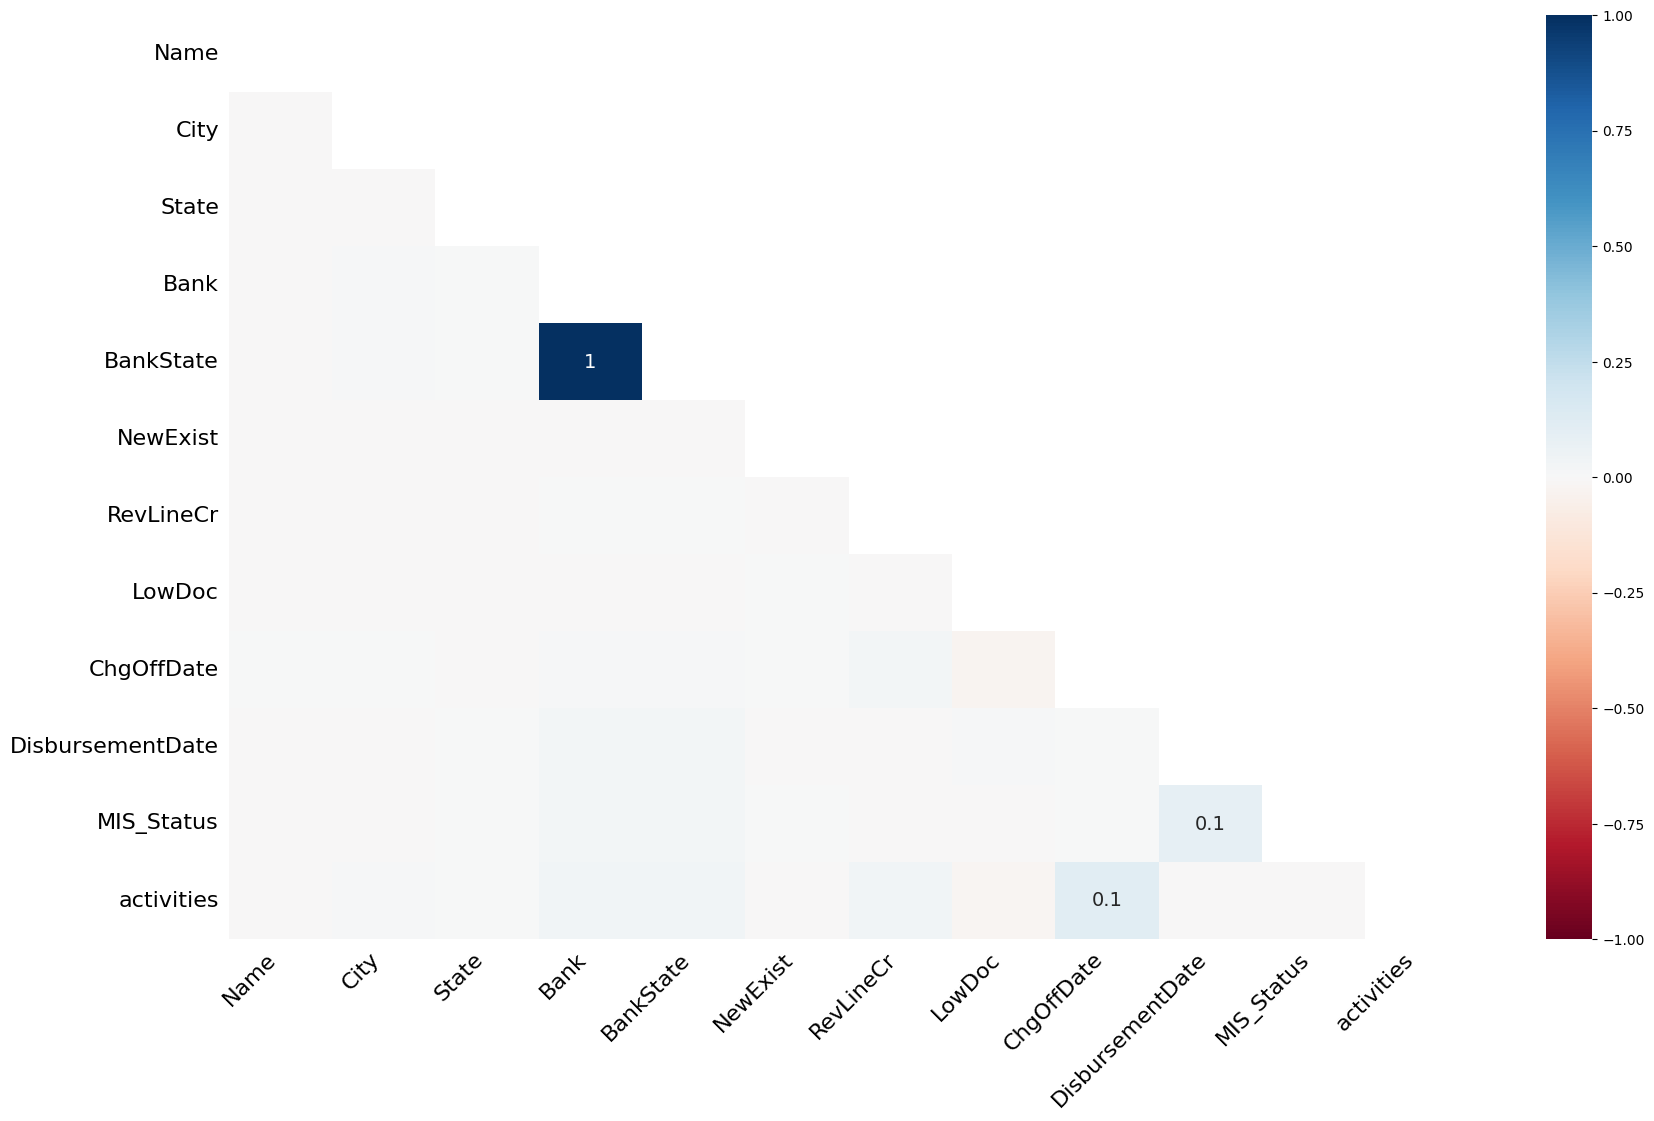

In [61]:
msno.heatmap(data)
plt.show()

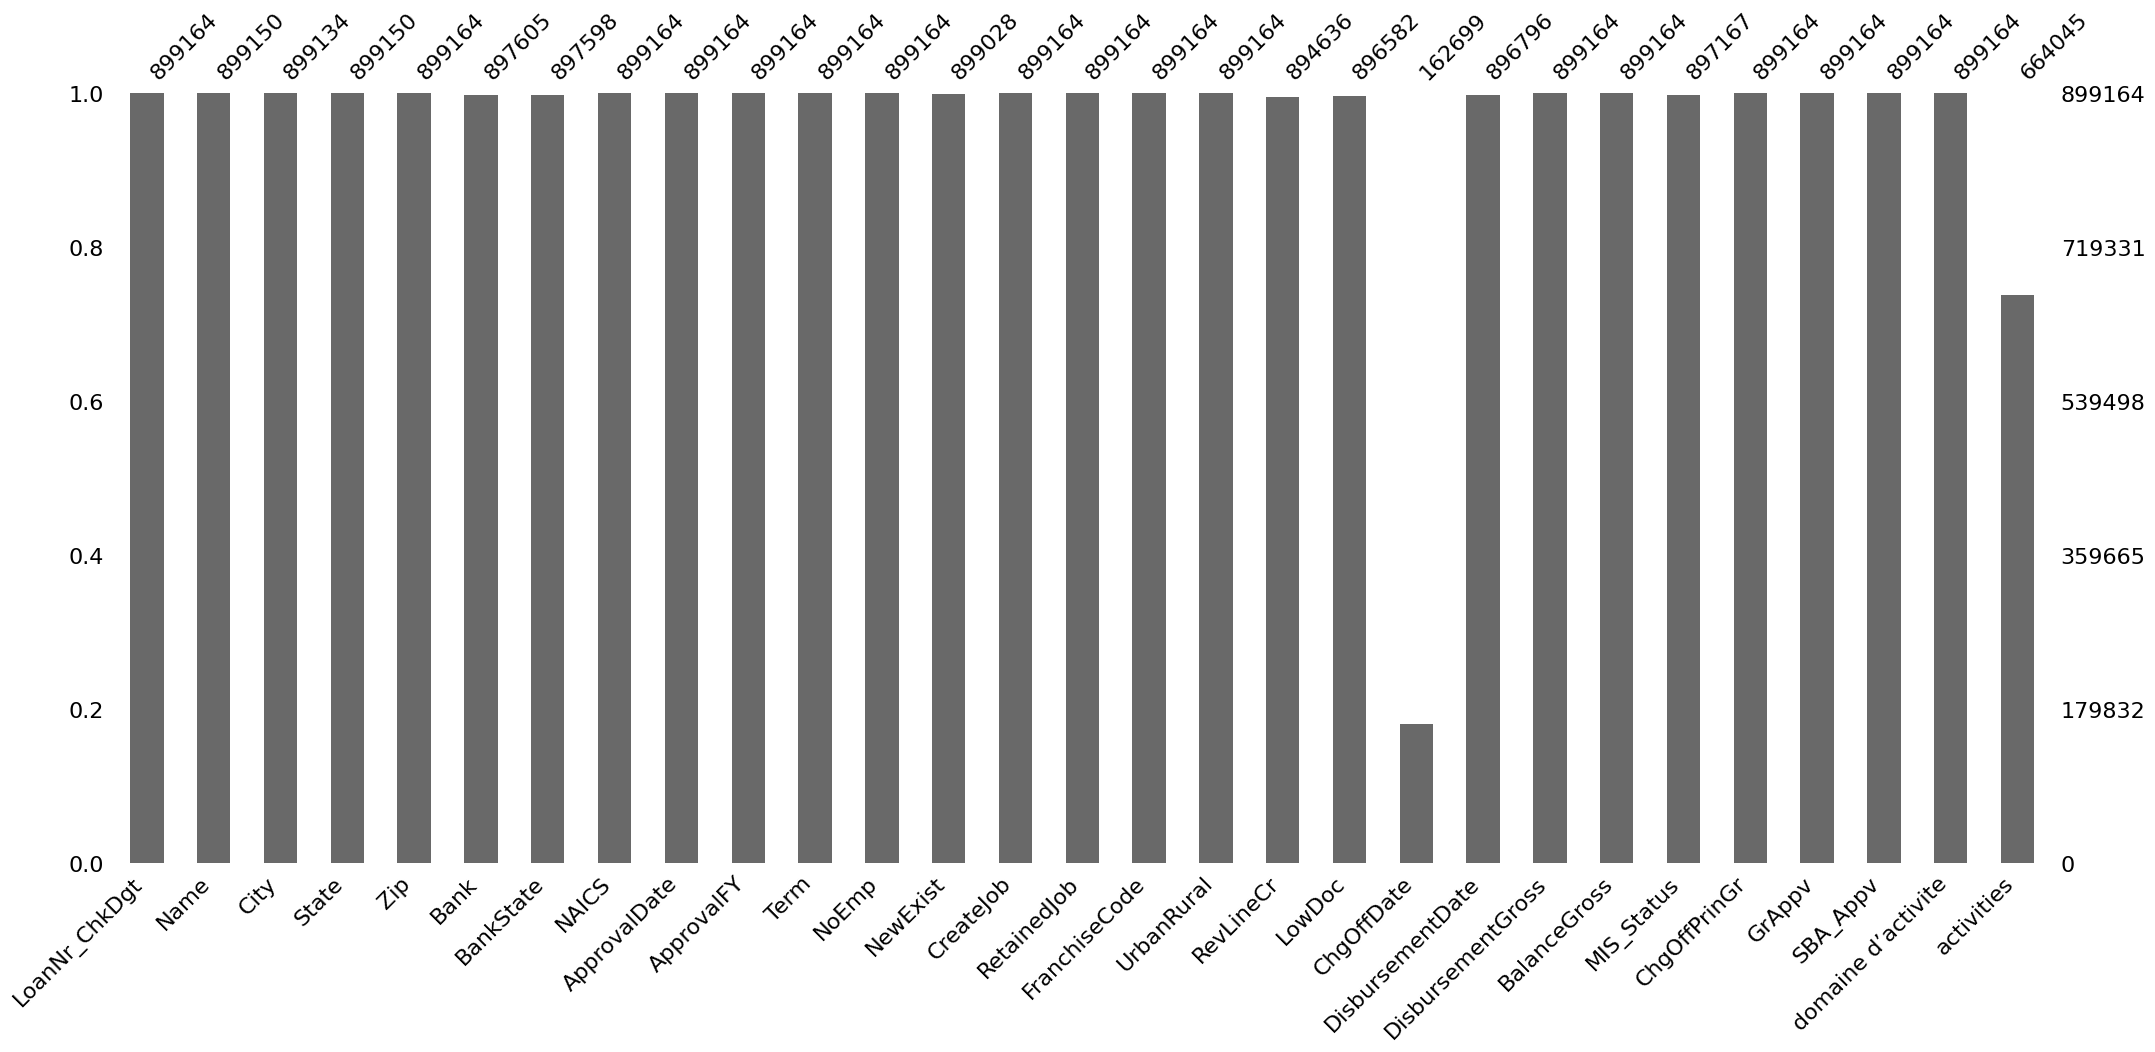

In [62]:
msno.bar(data)
plt.show()

In [ ]:
manquants